In [5]:

from changepointDetect import *
import os

root_path = "D:/Work/sign_gloss"

def makeJSONpath(gnum, person):
    fn = f'{gnum}.00{person}.C.json'
    return os.path.join(root_path, fn)

patha = makeJSONpath('43', 2)
rHandtip, lHandtip = getHandTipJointData(patha)
HandtipDisp = np.array(calculateDisplacement(rHandtip))

Strong CP:[129 139 179]
Weak CP:[]
sigMax:[117, 134, 148, 195]
Maxes:(117, 134)
Maxes:(134, 148)
Maxes:(148, 195)
diffarr:[(129, 147.272217592265), (179, 134.13396506710677), (139, 43.53464679600704)]
top2:[129, 179]
top2_from_changepointDetect:[129 179]


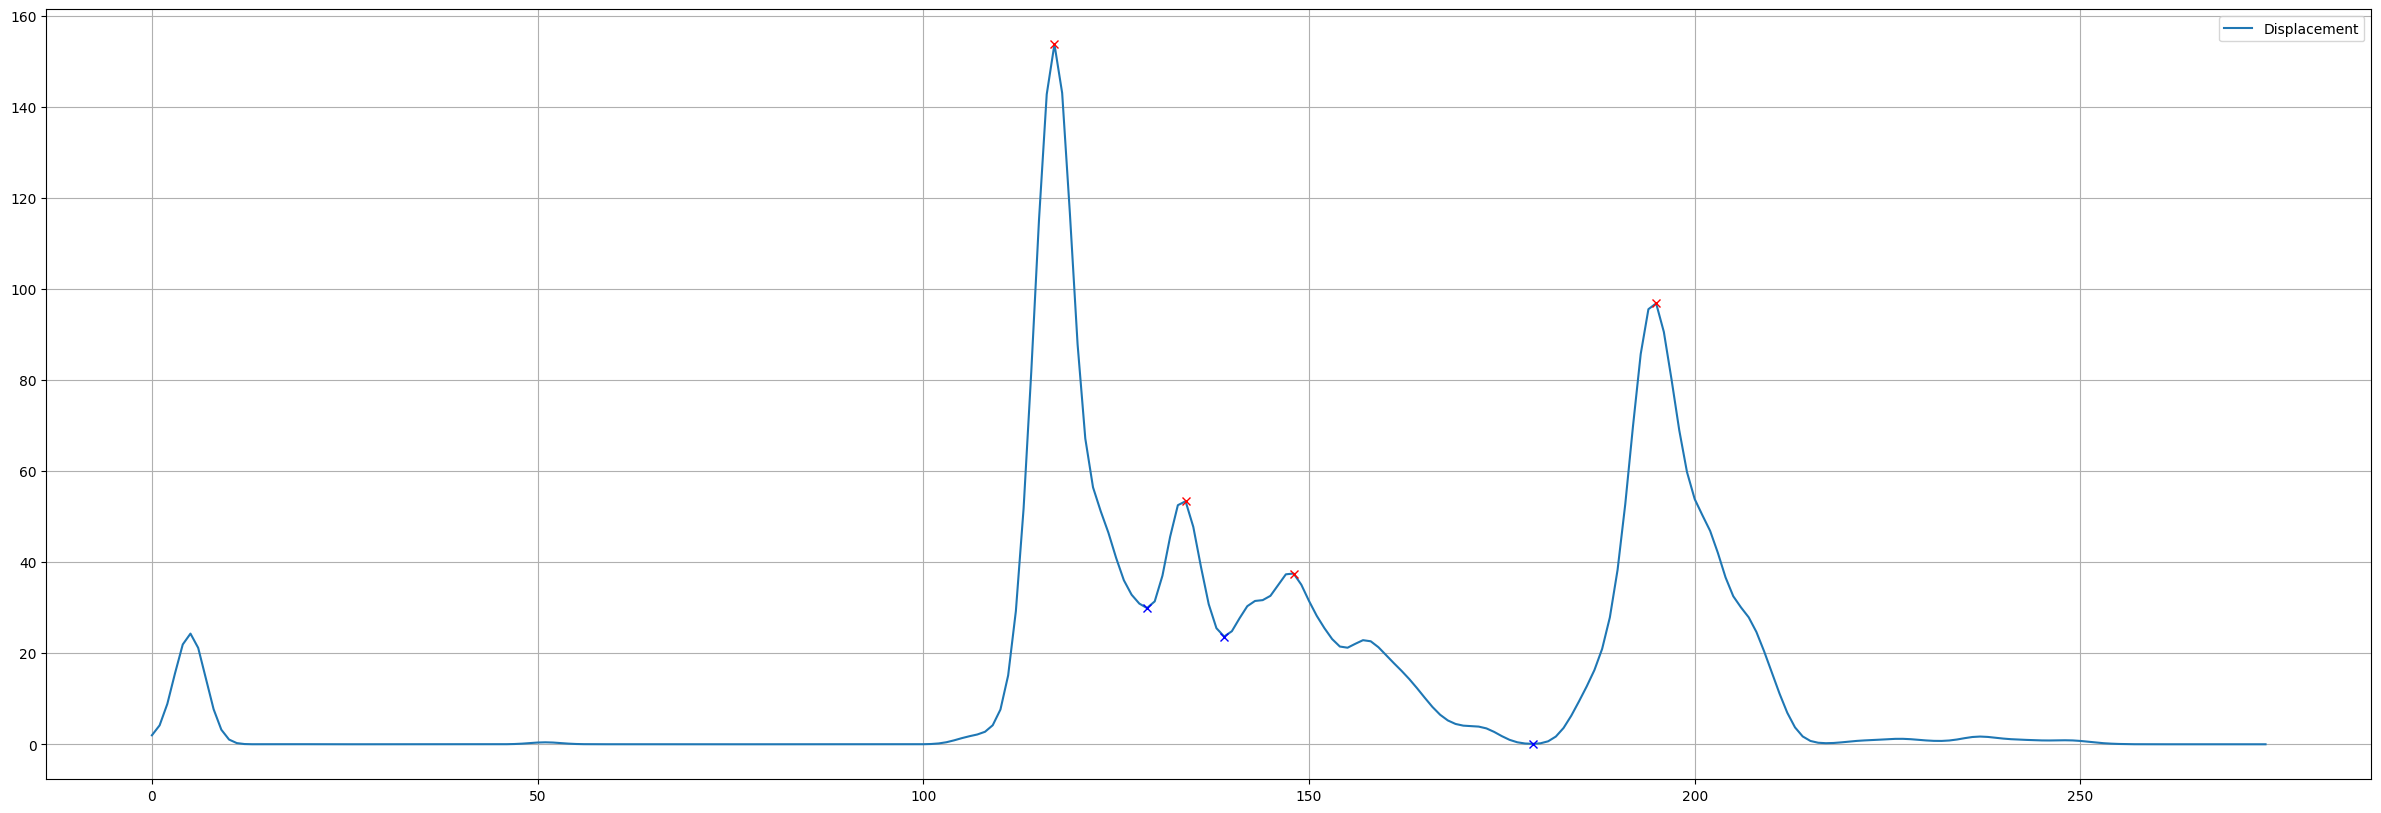

In [6]:
from matplotlib import pyplot as plt
import numpy as np

MIN_THRESHOLD = 0.35
MINOR_THRESHOLD = 0.1
MINOR_MAX_THRESHOLD = 0.3
ADJ_LOCAL_THRESHOLD = 15
SIGMA = 2.0
strong_cp, weak_cp = changepoint_detector(rHandtip, min_threshold=MIN_THRESHOLD, minor_threshold=MINOR_THRESHOLD, 
    adj_local_threshold=ADJ_LOCAL_THRESHOLD, sigma=SIGMA, minor_max_threshold=MINOR_MAX_THRESHOLD)

print(f'Strong CP:{strong_cp}')
print(f'Weak CP:{weak_cp}')

if len(strong_cp) < 2:
    strong_cp = np.concatenate((strong_cp, weak_cp))
    
handtipDispGaussFiltered = scipy.ndimage.gaussian_filter1d(HandtipDisp, SIGMA)

displacementLocalMin = argrelmin(handtipDispGaussFiltered)[0]
displacementLocalMax = argrelmax(handtipDispGaussFiltered)[0]

valarr = handtipDispGaussFiltered
sigMaxs = findSignificantMaxs(strong_cp, displacementLocalMax, valarr)
print(f'sigMax:{sigMaxs}')

diffarr = []
for idx, mi in enumerate(strong_cp):
    minval = valarr[mi]
    maxes = findAdjacentMaxIdxs(mi, sigMaxs)
    print(f'Maxes:{maxes}')
    diffarr.append( (mi, valarr[maxes[0]]-minval + valarr[maxes[1]]-minval) )

if len(diffarr) == 1:
    diffarr.append( (0,0) )
diffarr.sort(reverse=True, key= lambda element : element[1])
print(f'diffarr:{diffarr}')
top2 = [diffarr[0][0], diffarr[1][0]]
top2.sort()
print(f'top2:{top2}')

top2_from_changepointDetect = changepoint_top2(rHandtip, min_threshold=MIN_THRESHOLD, minor_threshold=MINOR_THRESHOLD, 
    adj_local_threshold=ADJ_LOCAL_THRESHOLD, sigma=SIGMA, minor_max_threshold=MINOR_MAX_THRESHOLD)

print(f'top2_from_changepointDetect:{top2_from_changepointDetect}')

plt.rcParams["figure.figsize"] = (30,10)
plt.plot(handtipDispGaussFiltered, label="Displacement")
plt.plot(strong_cp, handtipDispGaussFiltered[strong_cp], 'bx')
plt.plot(sigMaxs, handtipDispGaussFiltered[sigMaxs], 'rx')
plt.grid(True)
plt.legend()
plt.show()